In [52]:
# Imports
import time
import random
import numpy as np

from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model


<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(0.9999951, shape=(), dtype=float32)
tf.Tensor(1.2755394e-05, shape=(), dtype=float32)


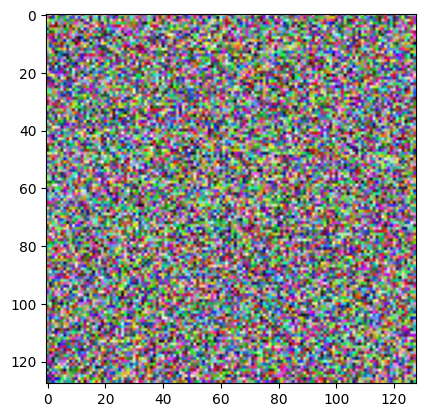

In [53]:
# create a random noise input image

input_shape = (128, 128, 3)

random_image = tf.random.uniform( shape = input_shape,
                                  minval = 0,
                                  maxval = 1,
                                  dtype = tf.dtypes.float32)
                                  #,seed = 10)

plt.imshow(random_image)
print(type(random_image))
print(tf.math.reduce_max(random_image))
print(tf.math.reduce_min(random_image))

In [54]:
# load a pre-trained CNN model 
from tensorflow.keras.applications import VGG19

vgg19_model = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape = input_shape 
    )



In [55]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [56]:
# create a submodel from the vgg19

layer_name = 'block3_conv1'

vgg19_submodel = Model(inputs = vgg19_model.input, outputs = vgg19_model.get_layer(layer_name).output)

vgg19_submodel.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

tf.Tensor(2.8893213, shape=(), dtype=float32)
tf.Tensor(8.248768, shape=(), dtype=float32)
tf.Tensor(12.5059595, shape=(), dtype=float32)
tf.Tensor(15.918711, shape=(), dtype=float32)
tf.Tensor(18.878565, shape=(), dtype=float32)
tf.Tensor(21.676785, shape=(), dtype=float32)
tf.Tensor(24.295479, shape=(), dtype=float32)
tf.Tensor(26.876123, shape=(), dtype=float32)
tf.Tensor(29.431309, shape=(), dtype=float32)
tf.Tensor(31.97044, shape=(), dtype=float32)
tf.Tensor(34.508484, shape=(), dtype=float32)
tf.Tensor(37.12127, shape=(), dtype=float32)
tf.Tensor(39.74479, shape=(), dtype=float32)
tf.Tensor(42.362915, shape=(), dtype=float32)
tf.Tensor(45.007263, shape=(), dtype=float32)
tf.Tensor(47.666954, shape=(), dtype=float32)
tf.Tensor(50.331207, shape=(), dtype=float32)
tf.Tensor(53.024124, shape=(), dtype=float32)
tf.Tensor(55.74978, shape=(), dtype=float32)
tf.Tensor(58.470978, shape=(), dtype=float32)
tf.Tensor(61.197838, shape=(), dtype=float32)
tf.Tensor(63.937607, shape=(), dtype=f

tf.Tensor(168.95235, shape=(), dtype=float32)
tf.Tensor(171.83356, shape=(), dtype=float32)


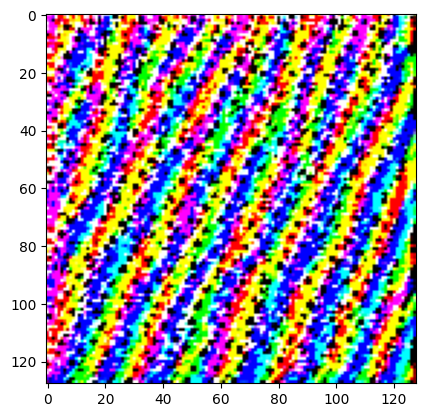

In [57]:
# training loop

filter_index = 0
#random_image = np.zeros(input_shape)
#random_image = tf.convert_to_tensor(random_image)

for i in range(60):
    with tf.GradientTape() as tape:
        tape.watch(random_image)
        out = vgg19_submodel(tf.expand_dims(random_image, axis = 0))[:,:,:,filter_index]
        loss = tf.math.reduce_mean(out)

    grads = tape.gradient(loss, random_image)
    grads = tf.math.l2_normalize(grads)
    random_image += grads * 15 
    print(loss)

plt.imshow(random_image)